In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

Wybrany graf przedstawia strony internetowe połączone linkami, czyli skierowanymi krawędziami. Zawiera ponad 800 tysięcy wierzchołków i ponad 5 milionów krawędzi. Graf został w 2002 roku udostępniony przez Google jako część organizowanego przez nich konkursu programistycznego

In [48]:
with open("web-Google.txt", "r") as f:
    graph_str = f.readlines()

In [49]:
edges = []
for line in graph_str[4:]:
    out_edge, in_edge = list(map(int, line.split()))
    edges.append((out_edge, in_edge))

graph = nx.DiGraph()
graph.add_edges_from(edges)

In [26]:
print(graph.number_of_nodes(), graph.number_of_edges())

875713 5105039


Do obliczenia page ranku używam gotowej funkcji z biblioteki Networkx

In [50]:
def page_rank(g: nx.DiGraph, damping_factor: float, e_vec: dict[int, float]):
    return nx.pagerank(g, alpha=damping_factor, personalization=e_vec)

In [53]:
def draw_distribution(nodes_rank, d_factor):
    x = [rank for _, rank in nodes_rank.items()]
    plt.hist(x, bins=10000)
    plt.xlim(0, max(x) / 100) # żeby lepiej było widać rozkład nie uwzględniam największych wartości, których jest bardzo mało
    plt.gca().set(title=f'Frequency Histogram(d = {d_factor})', ylabel='Frequency')
    plt.show()

In [54]:
damping_parameters = [0.9, 0.8, 0.7, 0.6, 0.5]

Wyniki gdy wektor e jest dany rozkładem jednostajnym

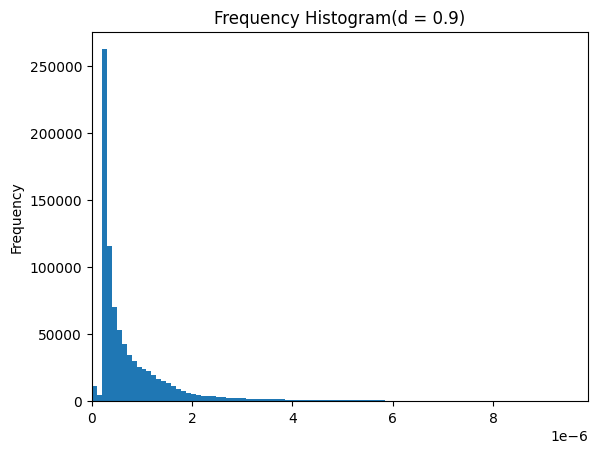

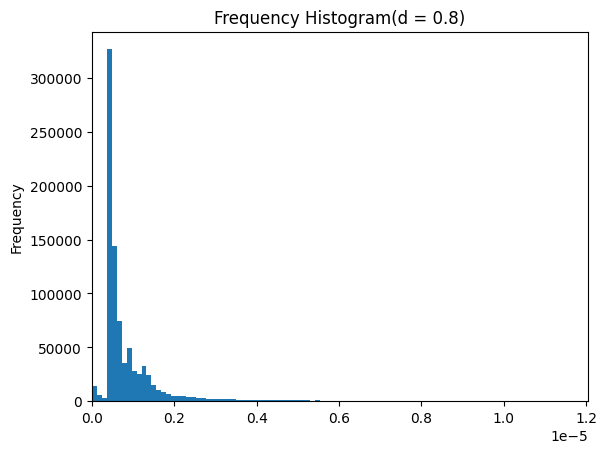

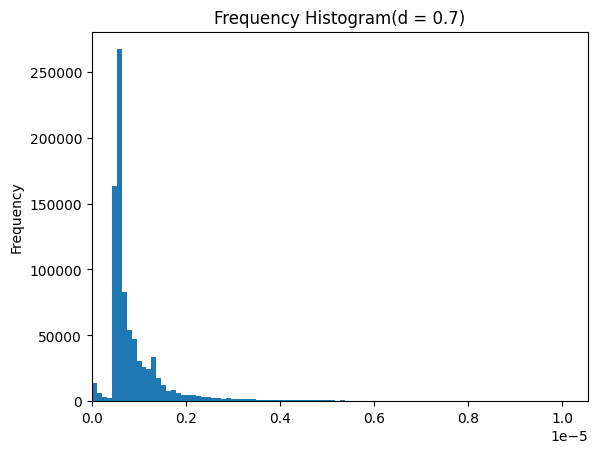

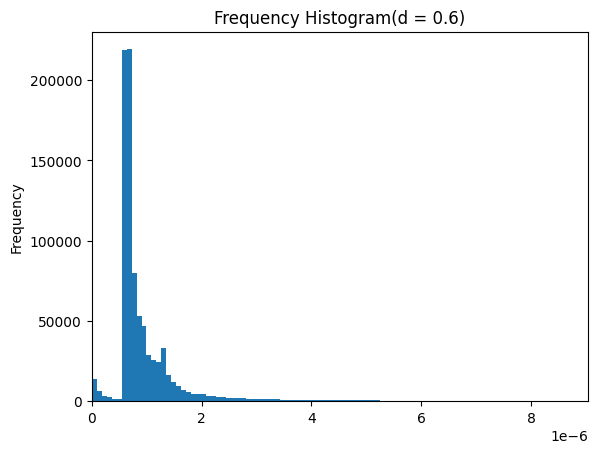

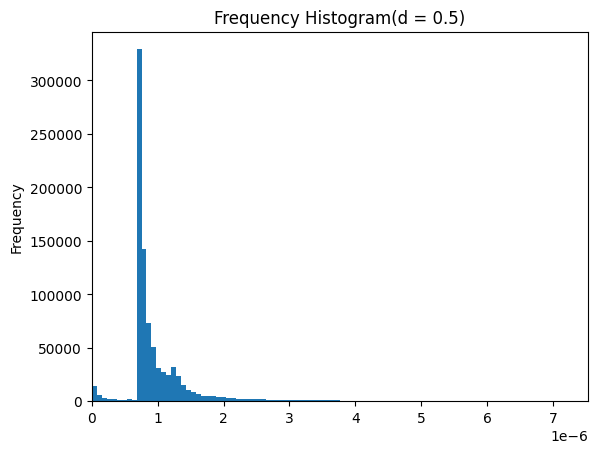

In [57]:
n = graph.number_of_nodes()
e = dict(enumerate(np.ones(n) / n))
for d in damping_parameters:
    ranks = page_rank(graph, d, e)
    draw_distribution(ranks, d)

Jako prawdopodobieństwo losowego skoku do wierzchołka wybrałem ilość krawędzi wchodzących do niego podzielone przez ilość wszystkich krawędzi

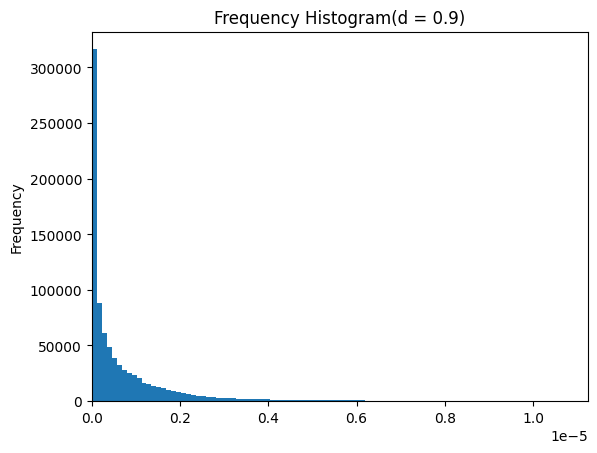

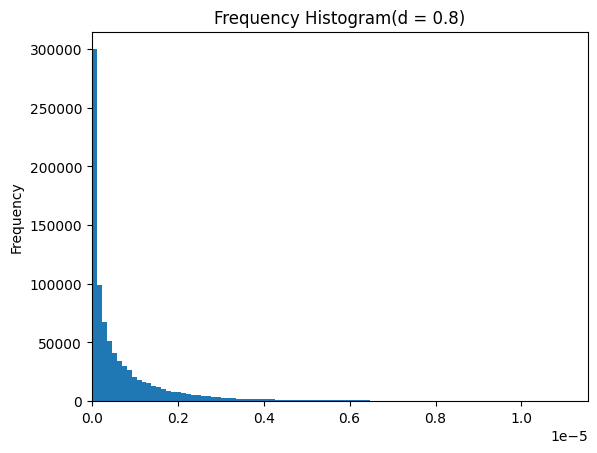

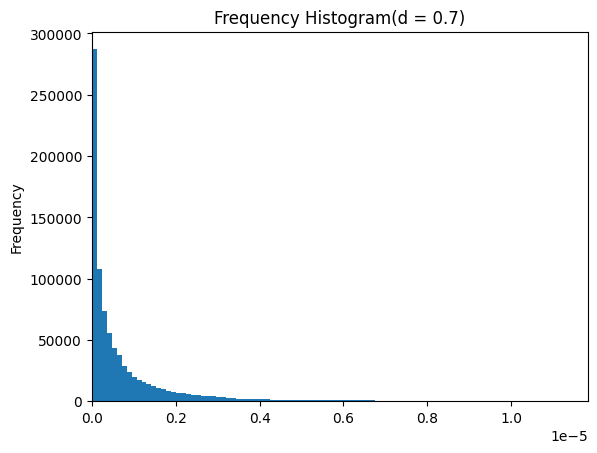

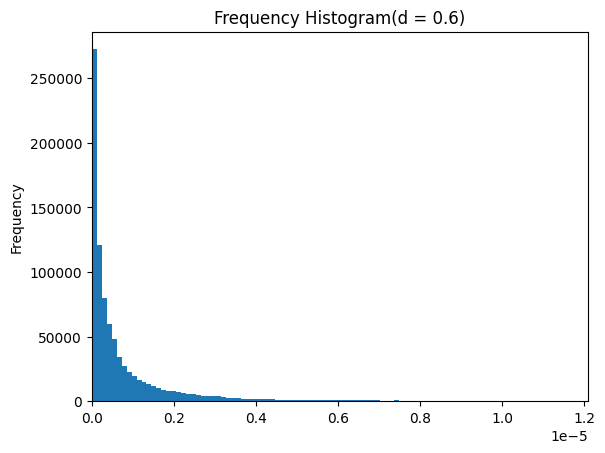

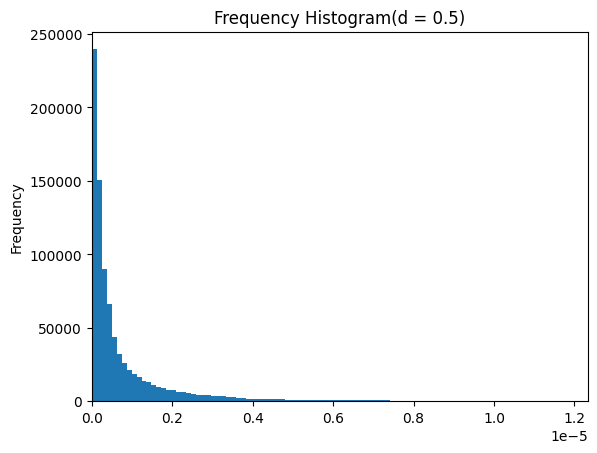

In [65]:
e = np.zeros(n)
for a, b in graph.edges:
    if b < n:
        e[b] += 1
e = e / graph.number_of_edges()
e = dict(enumerate(e))
for d in damping_parameters:
    ranks = page_rank(graph, d, e)
    draw_distribution(ranks, d)